# Solving simple FEM by FEniCS library

The first line in the program, we imports the key classes from FEniCS library including UnitSquareMesh, FunctionSpace, Function, and so forth. 

In [1]:
from fenics import *

We generate a uniform finite element mesh over unit squre $[0,1] \times [0,1]$. The mesh consists of cells which are triangles in 2 dimentional space. The parameters 8 and 10 indicate that the square is divided into $8\times 10$ regtangles, each divided into a pair of triangles. Thus, we have 160 triangle cells and $9 \cdot 11 = 99$ vertices or notes. 

[<matplotlib.lines.Line2D object at 0x7f638b1907b8>, <matplotlib.lines.Line2D object at 0x7f638b190b00>]


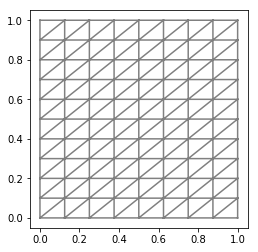

In [3]:
# Create a simple mesh and define function space
mesh = UnitSquareMesh(8,10)
print(plot(mesh))

Once the mesh had been created, we create a finite element space. The letter $'P'$ in the second argument specifies the type of element. In this case, the standard $P_1$ linear Lagrage element, which is a triangle with nodes a the three vertices, is employed.  

In [4]:
# We create a finite element function space
SpaceV = FunctionSpace(mesh, 'P', 1)

The Dirichlet boundary condition: $u=u_D = 1+ x^2 + 2y^2$ on $\partial \Omega$ is defined as follow

In [5]:
# Define boundary condition
u_D = Expression('1+ x[0]*x[0] + 2*x[1]*x[1]', degree = 2)

The expression depend on the variable $x[0]$ and $x[1]$ corresponding to the $x$ and $y$ coordinates. 

In [7]:
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(SpaceV, u_D, boundary)

The above def allow us to return a boolean value: True if the given point $x$ lies on the Dirichlet boundary and False, otherwise. The argument on_boundary is True if x is on the physical boundary of the mesh.
<p>
We will not distinguish between the trial and test spaces, instead, it is sufficient to work with one common space.

In [8]:
# Define variational problem
u = TrialFunction(SpaceV)
v = TestFunction(SpaceV)
f = Constant(-6.0)
a = dot(grad(u), grad(v)) *dx
L = f*v*dx

In [9]:
# Compute solution
u = Function(SpaceV)
solve(a == L, u, bc)

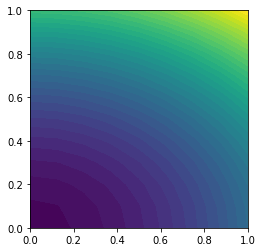

In [10]:
%matplotlib inline
# Plot solution and mesh
plot(u)

In [12]:
# Compute error in L2 norm 
error_L2 = errornorm(u_D, u, 'L2')
# Compute maximum error at vertices 
vertex_values_u_D = u_D.compute_vertex_values(mesh) 
vertex_values_u = u.compute_vertex_values(mesh) 
import numpy as np 
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))
# Print errors 

print('error_L2 =', error_L2) 
print('error_max =', error_max)


error_L2 = 0.006231570049175686
error_max = 1.7763568394002505e-15
